In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from analytics import WaterTemperatures, DissipatedHeat
from collections import defaultdict

 ### time_periods = [("2022-10-17", "2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
 ###          ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
 ###          ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23")]

In [2]:
time_periods = [("2022-10-17", "2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
           ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
           ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23")]

* 299 Т1к после ТО
* 307 P1контура
* 309 Р2контура
* 313 Рградирни
* 315 Т1к перед ТО
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1контура
* 481 Q2контура
#### Second loop pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [3]:
# name conventions 
# df_2loop_fin - df of 2nd loop (P, Q, Temperatures). Fin stands for status of dataframe

In [4]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [5]:
from preprocessing import CsvRefactorer

In [6]:
# load and read csvs
df_refac = CsvRefactorer.read_csv("041022_to_231222.csv")
df_refac_pumps = CsvRefactorer.read_csv("I_pumps_200921_to_231222.csv", index_range=("041022", "231222"))

In [57]:
# get all ids
ids = df_refac.df["ID"].unique()
ids_pumpms = df_refac_pumps.df["ID"].unique()
ids

array([299, 307, 309, 313, 315, 317, 319, 325, 327, 381, 395, 396, 460,
       461, 462, 463, 480, 481])

In [121]:
# select by ids
# automate it by creating interface (function) that returns array of array of dfs or just use loop
dfs_array_ids = []

for i in [[309, 317, 319, 327, 481], [381], [395]]:
    dfs_array_ids.append(df_refac.select_by_ids(i))
for i in [[406], [407], [408], [409]]:
    dfs_array_ids.append(df_refac_pumps.select_by_ids(i))
    
# df_2loop_ids = df_refac.select_by_ids([309, 317, 319, 327, 481])
# df_pump_1_id = df_refac_pumps.select_by_ids([406])
# df_pump_2_id = df_refac_pumps.select_by_ids([407])
# df_pump_3_id = df_refac_pumps.select_by_ids([408])
# df_pump_4_id = df_refac_pumps.select_by_ids([409])
# df_ctf_1_id = df_refac.select_by_ids([381])
# df_ctf_2_id = df_refac.select_by_ids([395])

In [122]:
# groupby by 60min
dfs_array_gr = []
for i in dfs_array_ids:
    dfs_array_gr.append(df_refac.min_frac_groupby("60", *i))

# df_2loop_gr = df_refac.min_frac_groupby("60", *df_2loop_ids)
# df_pump_1_gr = df_refac.min_frac_groupby("60", *df_pump_1_id)
# df_pump_2_gr = df_refac.min_frac_groupby("60", *df_pump_2_id)
# df_pump_3_gr = df_refac.min_frac_groupby("60", *df_pump_3_id)
# df_pump_4_gr = df_refac.min_frac_groupby("60", *df_pump_4_id)
# df_ctf_1_gr = df_refac.min_frac_groupby("60", *df_ctf_1_id)
# df_ctf_2_gr = df_refac.min_frac_groupby("60", *df_ctf_2_id)

In [127]:
# merge dfs that do meet requirements (create proper architecture of df)
dfs_array = []
for i in dfs_array_gr:
    dfs_array.append(df_refac.create_df_from_dfs("ID", i))

    # df_2loop = df_refac.create_df_from_dfs("ID", df_2loop_gr)
# df_pump_1 = df_refac.create_df_from_dfs("ID", df_pump_1_gr)
# df_pump_2 = df_refac.create_df_from_dfs("ID", df_pump_2_gr)
# df_pump_3 = df_refac.create_df_from_dfs("ID", df_pump_3_gr)
# df_pump_4 = df_refac.create_df_from_dfs("ID", df_pump_4_gr)
# df_ctf_1 = df_refac.create_df_from_dfs("ID", df_ctf_1_gr)
# df_ctf_2 = df_refac.create_df_from_dfs("ID", df_ctf_2_gr)

In [128]:
# adding Qdis (heat dissipated in 2nd loop)
dfs_array[0]["Qdis"] = dfs_array[0][481]*1.16*(dfs_array[0][319] - dfs_array[0][317])
dfs_array

[                          309        317        319        327         481  \
 Timestamp                                                                    
 2022-10-04 09:00:00  0.010000  17.400000  22.593903   0.124390    1.000000   
 2022-10-04 10:00:00  0.010000  17.400000  22.563000   4.122222    1.000000   
 2022-10-04 11:00:00  0.010000  17.400000  22.668617   6.481858    1.000000   
 2022-10-04 12:00:00  0.010000  17.400000  22.982447   7.913699    1.000000   
 2022-10-04 13:00:00  0.010000  17.400000  23.344086   8.110599    1.000000   
 ...                       ...        ...        ...        ...         ...   
 2022-12-23 11:00:00  0.420000  19.979897  25.958673 -20.816818  618.400000   
 2022-12-23 12:00:00  0.420000  20.275000  26.335567 -20.190611  622.500000   
 2022-12-23 13:00:00  0.420000  19.046907  25.251282 -20.048624  622.750000   
 2022-12-23 14:00:00  0.420000  18.431579  24.616043 -19.793518  622.266667   
 2022-12-23 15:00:00  0.415946  18.021488  22.361654

In [130]:
# split each df on time periods
# array of dict where each dict is df splitted by time periods
df_array_tp = []
for i in dfs_array:
    df_array_tp.append(df_refac.select_time_period(i, time_periods))
# df_2loop_tp = df_refac.select_time_period(df_2loop, time_periods)
# df_pump_1_tp = df_refac.select_time_period(df_pump_1, time_periods)
# df_pump_2_tp = df_refac.select_time_period(df_pump_2, time_periods)
# df_pump_3_tp = df_refac.select_time_period(df_pump_3, time_periods)
# df_pump_4_tp = df_refac.select_time_period(df_pump_4, time_periods)
# df_ctf_1_tp = df_refac.select_time_period(df_ctf_1, time_periods)
# df_ctf_2_tp = df_refac.select_time_period(df_ctf_2, time_periods)
df_array_tp

[{'2022-10-17 2022-10-21':                           309        317        319       327         481  \
  Timestamp                                                                   
  2022-10-17 14:00:00  0.302121  13.584466  15.794059  9.898190  850.460674   
  2022-10-17 15:00:00  0.446229  15.415349  18.245299  9.341818  772.504167   
  2022-10-17 16:00:00  0.450000  21.552917  26.007083  7.153191  762.337500   
  2022-10-17 17:00:00  0.450000  24.913636  30.119289  6.018009  762.250000   
  2022-10-17 18:00:00  0.450000  23.436021  29.602674  5.754091  759.866667   
  ...                       ...        ...        ...       ...         ...   
  2022-10-21 15:00:00  0.450000  23.870270  30.184325  8.480365  754.062500   
  2022-10-21 16:00:00  0.450000  23.861827  30.172728  7.640000  753.500000   
  2022-10-21 17:00:00  0.450000  23.733690  30.082540  6.728302  752.470833   
  2022-10-21 18:00:00  0.450000  22.567805  29.140000  6.294660  748.175000   
  2022-10-21 19:00:00  0.42

In [131]:
# for further analytics and research first 3 time periods will be taken
# name conventions for this periods: tp1, tp2, tp3
tp1, tp2, tp3, *rest = list(df_2loop_tp.keys())

In [166]:
# output is now different from above
# all parameters now belongs to certain time period
df_array_tp12 = defaultdict(list)
for i in df_array_tp:
#     dates = defaultdict(list)
    for dates in [tp1, tp2]:
        df_array_tp12[dates].append(i[dates])
df_array_tp12

defaultdict(list,
            {'2022-10-17 2022-10-21': [                          309        317        319       327         481  \
              Timestamp                                                                   
              2022-10-17 14:00:00  0.302121  13.584466  15.794059  9.898190  850.460674   
              2022-10-17 15:00:00  0.446229  15.415349  18.245299  9.341818  772.504167   
              2022-10-17 16:00:00  0.450000  21.552917  26.007083  7.153191  762.337500   
              2022-10-17 17:00:00  0.450000  24.913636  30.119289  6.018009  762.250000   
              2022-10-17 18:00:00  0.450000  23.436021  29.602674  5.754091  759.866667   
              ...                       ...        ...        ...       ...         ...   
              2022-10-21 15:00:00  0.450000  23.870270  30.184325  8.480365  754.062500   
              2022-10-21 16:00:00  0.450000  23.861827  30.172728  7.640000  753.500000   
              2022-10-21 17:00:00  0.450000  23

In [167]:
# filter 1st period to observe steady state condition
# upon previosly made tests - filter by temperature or by Qdis
# filter two first tp by Qdis
md_dh = 0.02 # share threshold
dh_anals = DissipatedHeat(md_dh)
ind = 0 # index of df which to filter

# it's a short version so only 2 first tp are filtered 
for dates in [tp1, tp2]:
     df_array_tp12[dates][ind], r =  dh_anals.df_md_filter(df_array_tp12[dates][ind], "Qdis")
df_array_tp12

defaultdict(list,
            {'2022-10-17 2022-10-21': [                          309        317        319       327         481  \
              Timestamp                                                                   
              2022-10-17 18:00:00  0.450000  23.436021  29.602674  5.754091  759.866667   
              2022-10-17 19:00:00  0.450000  23.230688  29.451052  5.632039  760.366667   
              2022-10-17 20:00:00  0.450000  23.113757  29.384408  5.305963  761.337500   
              2022-10-17 21:00:00  0.450000  22.951052  29.242487  4.877073  761.841667   
              2022-10-18 15:00:00  0.450000  23.997368  30.352973  7.280091  756.808333   
              2022-10-19 12:00:00  0.450000  23.122827  29.456614  4.638117  758.570833   
              2022-10-19 14:00:00  0.450000  23.485405  29.811399  5.756696  757.883333   
              2022-10-19 15:00:00  0.450000  23.496907  29.874731  6.564444  753.595833   
              2022-10-19 21:00:00  0.450000  22

In [168]:
# now need to apply filtered datetime range to all dfs in df_array_tp
# in that way we keep df in the same time ranges (equal)

df_array_tp12_fd = [] 

for dates in [tp1, tp2]:
    fltd_df_ind = df_array_tp12[dates][ind].index
    for i in range(len(df_array_tp12[dates])):
        df_array_tp12[dates][i] = df_array_tp12[dates][i]\
            .sort_index().loc[fltd_df_ind[0] : fltd_df_ind[-1]]
df_array_tp12

defaultdict(list,
            {'2022-10-17 2022-10-21': [                          309        317        319       327         481  \
              Timestamp                                                                   
              2022-10-17 18:00:00  0.450000  23.436021  29.602674  5.754091  759.866667   
              2022-10-17 19:00:00  0.450000  23.230688  29.451052  5.632039  760.366667   
              2022-10-17 20:00:00  0.450000  23.113757  29.384408  5.305963  761.337500   
              2022-10-17 21:00:00  0.450000  22.951052  29.242487  4.877073  761.841667   
              2022-10-18 15:00:00  0.450000  23.997368  30.352973  7.280091  756.808333   
              2022-10-19 12:00:00  0.450000  23.122827  29.456614  4.638117  758.570833   
              2022-10-19 14:00:00  0.450000  23.485405  29.811399  5.756696  757.883333   
              2022-10-19 15:00:00  0.450000  23.496907  29.874731  6.564444  753.595833   
              2022-10-19 21:00:00  0.450000  22

['2022-10-17 2022-10-21', '2022-11-08 2022-11-11']


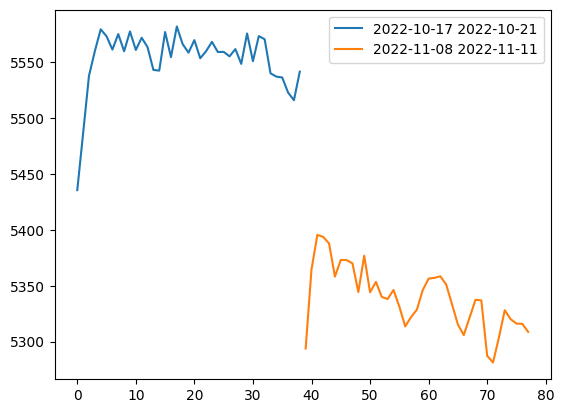

In [171]:
dates = [tp1, tp2]
st = 0
print(dates)
for n, _ in enumerate(dates):
    X = np.arange(st, len(df_array_tp12[dates[n]][0]) + st, 1)
    st = len(df_array_tp12[dates[n]][0])
    plt.plot(X, df_array_tp12[dates[n]][0]["Qdis"], label=dates[n])
plt.legend()